# 이미지분할 다른부분과 밝기가 비슷할때 사용(밝은 부분과 어두운 부분 분리할때는 성능이 좋지 않다)

In [45]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

* 이미지를 열고 직사각형을 그리는 마우스 콜백함수

In [65]:
img = cv2.imread('../data/Lena.png', cv2.IMREAD_COLOR)
show_img = np.copy(img)

mouse_pressed = False
y = x = w = h = 0

def mouse_callback(event, _x, _y, flags, param):
    global show_img, x, y, w, h, mouse_pressed

    if event == cv2.EVENT_LBUTTONDOWN:
        mouse_pressed = True
        x, y = _x, _y
        show_img = np.copy(img)

    elif event == cv2.EVENT_MOUSEMOVE:
        if mouse_pressed:
            show_img = np.copy(img)
            cv2.rectangle(show_img, (x, y),
                          (_x, _y), (0, 255, 0), 3)

    elif event == cv2.EVENT_LBUTTONUP:
        mouse_pressed = False
        w, h = _x - x, _y - y

* 이미지를 표시 -> 사각형 크롭 -> A누르면 종료

In [66]:
cv2.namedWindow('image')
cv2.setMouseCallback('image', mouse_callback)

while True:
    cv2.imshow('image', show_img)
    k = cv2.waitKey(1)

    if k == ord('a') and not mouse_pressed:
        if w*h > 0:
            break

cv2.destroyAllWindows()

* grabCut : 3채널 이미지 입력, 픽셀에 대한 초기 레이블이 있는 행렬(mask), 레이블 초깃값을 정의하는 사각형, 처리상태를 저장할 두개의 행렬, 반복횟수, 실행할 함수의 모드

* 리턴값 : 레이블 행렬과 처리상태나타는 두행렬 리턴

* cv2.GC_BGD : 픽셀이 배경에 확실히 속함 , cv2.GC_PR_BGD(배경일 가능성이 있는 픽셀), cv2.GC_PR_FGD(전경일 가능성이 있는 픽셀),cv2._FGD(픽셀이 전경에 확실히 속함)

* cv2.GC_INIT_WITH_RECT : 세번째 인수의 사각형으로 초기의 레이블을 정의할 때 사용, 이 경우 사각형 외부의 펙셀은 cv2.bgd로 설정되고 사각형 내부의 픽셀은 cv2.fgd로 설정

* cv2.GC_INIT_WITH_MASK : 초기의 레이블을 함수의 두번째 인수인 행렬의 값을 사용
* cv2.GC_BGD, cv2.GC_PR_BGD, cv2.GC_PR_FGD,cv2._FGD 중 하나로 설정해야됨

In [59]:
labels = np.zeros(img.shape[:2],np.uint8)

labels, bgdModel, fgdModel = cv2.grabCut(img, labels, (x, y, w, h), None, None, 5, cv2.GC_INIT_WITH_RECT)

show_img = np.copy(img)
show_img[(labels == cv2.GC_PR_BGD)|(labels == cv2.GC_BGD)]  //= 3

cv2.imshow('image', show_img)
cv2.waitKey()
cv2.destroyAllWindows()

<img src="./grabcut1.png">

* grabcut알고리즘으로 분리된 전경을 수정하기 위해 흑백 선을 그리는 함수

In [54]:
show_img.shape

(512, 512, 3)

In [75]:
label = cv2.GC_BGD
lbl_clrs = {cv2.GC_BGD: (0,0,0), cv2.GC_FGD: (255,255,255)}

def mouse_callback(event, x, y, flags, param):
    global mouse_pressed

    if event == cv2.EVENT_LBUTTONDOWN:
        mouse_pressed = True
        cv2.circle(labels, (x, y), 5, label, cv2.FILLED)
        cv2.circle(show_img, (x, y), 5, lbl_clrs[label], cv2.FILLED)

    elif event == cv2.EVENT_MOUSEMOVE:
        if mouse_pressed:
            cv2.circle(labels, (x, y), 5, label, cv2.FILLED)
            cv2.circle(show_img, (x, y), 5, lbl_clrs[label], cv2.FILLED)

    elif event == cv2.EVENT_LBUTTONUP:
        mouse_pressed = False

In [77]:
cv2.namedWindow('image')
cv2.setMouseCallback('image', mouse_callback)

while True:
    cv2.imshow('image', show_img)
    k = cv2.waitKey(1)

    if k == ord('a') and not mouse_pressed:
        break
    elif k == ord('l'):
        label = cv2.GC_FGD - label

cv2.destroyAllWindows()

labels, bgdModel, fgdModel = cv2.grabCut(img, labels, None, bgdModel, fgdModel, 5, cv2.GC_INIT_WITH_MASK)

show_img = np.copy(img)
show_img[(labels == cv2.GC_PR_BGD)|(labels == cv2.GC_BGD)] //= 3

cv2.imshow('image', show_img)
cv2.waitKey()
cv2.destroyAllWindows()

* 다른코드(ex)

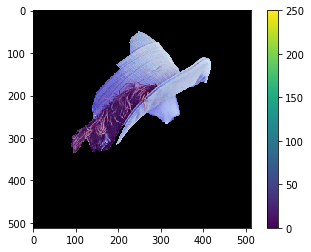

(<matplotlib.image.AxesImage at 0x25b99985da0>,
 None)

In [74]:
 
img = cv2.imread('../data/Lena.png')
mask = np.zeros(img.shape[:2],np.uint8)
 
bgdModel = np.zeros((1,65),np.float64)
fgdModel = np.zeros((1,65),np.float64)
 
# Step 1
rect = (50,50,450,290)
cv2.grabCut(img,mask,rect,bgdModel,fgdModel,1,cv2.GC_INIT_WITH_RECT)
 
# Step 2
newmask = cv2.imread('./data/newmask2.png',0)
mask[newmask == 0] = 0
mask[newmask == 255] = 1
cv2.grabCut(img,mask,None,bgdModel,fgdModel,,cv2.GC_INIT_WITH_MASK)
 
mask2 = np.where((mask==2)|(mask==0),0,1).astype('uint8')
img = img*mask2[:,:,np.newaxis]
plt.imshow(img),plt.colorbar(),plt.show()